In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report)

In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
def get_max_emotion_score_df(file, emotion_col, emotion_count_col):
    df = pd.read_csv(file)
    df[emotion_col] = df[['joy','sadness','anger','love','thankfulness','fear']].idxmax(axis=1)
    df[emotion_count_col] = df[emotion_col].groupby(df[emotion_col]).transform(emotion_count_col)
    return df

In [4]:
def display_bar_chart(df, emotion_col, emotion_count_col):
    emotions = df[emotion_col].unique()
    emotions_count = []
    for emotion in emotions:
        emotions_count.append(df[df[emotion_col]==emotion][:1][emotion_count_col].item())
    # for emotion, count in zip(emotions, emotions_count):
    #    print(f"{emotion}: {count}")
    data_tuples = list(zip(emotions, emotions_count))
    df = pd.DataFrame(data_tuples, columns=['emotions','count'])
    plt.figure(figsize=(10,5))
    g = sns.barplot(x='emotions', y='count', data=df.sort_values('emotions'))

## Original Dataset

In [5]:
og_df = pd.read_csv("data/labelled_novel_dataset.csv")
og_df["count"] = og_df["emotions"].groupby(og_df["emotions"]).transform("count")
og_df.head()

,text,emotions,count
0,I suppose she must have looked rather delightful,joy,30
1,Mrs. Darling put her hand to her heart and cried,sadness,40
2,"She was a lovely lady, with a romantic mind an...",love,22
3,"Her romantic mind was like the tiny boxes, one...",love,22
4,her sweet mocking mouth had one kiss on it tha...,love,22


In [6]:
og_df = og_df.loc[og_df['emotions'] != "surprise"]

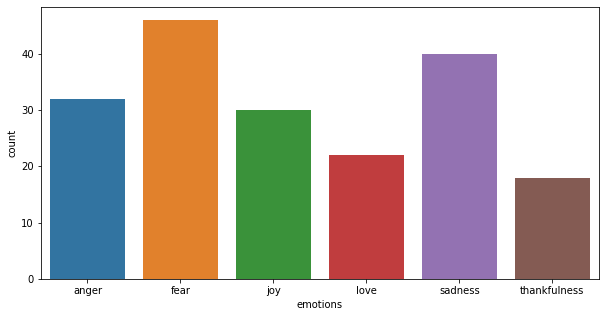

In [7]:
display_bar_chart(og_df, emotion_col="emotions", emotion_count_col="count")

## Predicted Dataset

In [8]:
df = pd.read_csv("results/detected_emotions_novel_output_main.csv")
df.head()

,text,joy,sadness,anger,love,thankfulness,fear
0,I suppose she must have looked rather delightful,0.049,0.891,0.514,0.563,0.823,0.022
1,Mrs. Darling put her hand to her heart and cried,0.598,0.601,0.214,0.338,0.531,0.404
2,"She was a lovely lady, with a romantic mind an...",0.888,0.169,0.770,0.536,0.866,0.209
3,"Her romantic mind was like the tiny boxes, one...",0.410,0.341,0.418,0.646,0.737,0.114
4,her sweet mocking mouth had one kiss on it tha...,0.309,0.797,0.939,0.860,0.712,0.250


In [9]:
pred_df = get_max_emotion_score_df(file="results/detected_emotions_novel_output_main.csv",
                             emotion_col="emotions",
                             emotion_count_col="count")
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count
0,I suppose she must have looked rather delightful,0.049,0.891,0.514,0.563,0.823,0.022,sadness,36
1,Mrs. Darling put her hand to her heart and cried,0.598,0.601,0.214,0.338,0.531,0.404,sadness,36
2,"She was a lovely lady, with a romantic mind an...",0.888,0.169,0.770,0.536,0.866,0.209,joy,18
3,"Her romantic mind was like the tiny boxes, one...",0.410,0.341,0.418,0.646,0.737,0.114,thankfulness,80
4,her sweet mocking mouth had one kiss on it tha...,0.309,0.797,0.939,0.860,0.712,0.250,anger,27


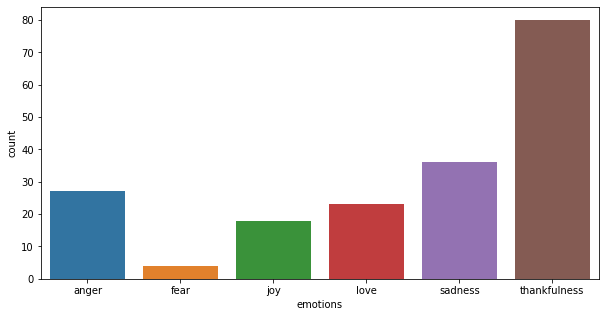

In [10]:
display_bar_chart(pred_df, emotion_col="emotions", emotion_count_col="count")

### Categorize Emotions column (Original dataset)

In [11]:
og_df.dtypes

text        object
emotions    object
count        int64
dtype: object

In [12]:
og_df["emotions"] = og_df["emotions"].astype('category')

In [13]:
category_dict = dict(sorted(zip(og_df.emotions.cat.codes, og_df.emotions)))

In [14]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [15]:
og_df.dtypes

text          object
emotions    category
count          int64
dtype: object

In [16]:
og_df["emotions_cat"] = og_df["emotions"].cat.codes
og_df.head()

,text,emotions,count,emotions_cat
0,I suppose she must have looked rather delightful,joy,30,2
1,Mrs. Darling put her hand to her heart and cried,sadness,40,4
2,"She was a lovely lady, with a romantic mind an...",love,22,3
3,"Her romantic mind was like the tiny boxes, one...",love,22,3
4,her sweet mocking mouth had one kiss on it tha...,love,22,3


### Categorize Emotions column (Predicted dataset)

In [17]:
pred_df.dtypes

text             object
joy             float64
sadness         float64
anger           float64
love            float64
thankfulness    float64
fear            float64
emotions         object
count             int64
dtype: object

In [18]:
pred_df["emotions"] = pred_df["emotions"].astype('category')

In [19]:
category_dict = dict(sorted(zip(pred_df.emotions.cat.codes, pred_df.emotions)))

In [20]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [21]:
pred_df.dtypes

text              object
joy              float64
sadness          float64
anger            float64
love             float64
thankfulness     float64
fear             float64
emotions        category
count              int64
dtype: object

In [22]:
pred_df["emotions_cat"] = pred_df["emotions"].cat.codes
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,I suppose she must have looked rather delightful,0.049,0.891,0.514,0.563,0.823,0.022,sadness,36,4
1,Mrs. Darling put her hand to her heart and cried,0.598,0.601,0.214,0.338,0.531,0.404,sadness,36,4
2,"She was a lovely lady, with a romantic mind an...",0.888,0.169,0.770,0.536,0.866,0.209,joy,18,2
3,"Her romantic mind was like the tiny boxes, one...",0.410,0.341,0.418,0.646,0.737,0.114,thankfulness,80,5
4,her sweet mocking mouth had one kiss on it tha...,0.309,0.797,0.939,0.860,0.712,0.250,anger,27,0


In [23]:
og_df

,text,emotions,count,emotions_cat
0,I suppose she must have looked rather delightful,joy,30,2
1,Mrs. Darling put her hand to her heart and cried,sadness,40,4
2,"She was a lovely lady, with a romantic mind an...",love,22,3
3,"Her romantic mind was like the tiny boxes, one...",love,22,3
4,her sweet mocking mouth had one kiss on it tha...,love,22,3
5,the many gentlemen who had been boys when she ...,love,22,3
6,"Wendy thought Napoleon could have got it, but ...",anger,32,0
7,Mr. Darling used to boast to Wendy that her mo...,love,22,3
8,he often said stocks were up and shares were d...,thankfulness,18,5
9,For a week or two after Wendy came it was doub...,sadness,40,4


In [24]:
pred_df

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,I suppose she must have looked rather delightful,0.049,0.891,0.514,0.563,0.823,0.022,sadness,36,4
1,Mrs. Darling put her hand to her heart and cried,0.598,0.601,0.214,0.338,0.531,0.404,sadness,36,4
2,"She was a lovely lady, with a romantic mind an...",0.888,0.169,0.770,0.536,0.866,0.209,joy,18,2
3,"Her romantic mind was like the tiny boxes, one...",0.410,0.341,0.418,0.646,0.737,0.114,thankfulness,80,5
4,her sweet mocking mouth had one kiss on it tha...,0.309,0.797,0.939,0.860,0.712,0.250,anger,27,0
5,the many gentlemen who had been boys when she ...,0.444,0.462,0.849,0.563,0.900,0.139,thankfulness,80,5
6,"Wendy thought Napoleon could have got it, but ...",0.405,0.956,0.337,0.687,0.870,0.117,sadness,36,4
7,Mr. Darling used to boast to Wendy that her mo...,0.144,0.715,0.632,0.108,0.580,0.124,sadness,36,4
8,he often said stocks were up and shares were d...,0.048,0.268,0.406,0.315,0.950,0.114,thankfulness,80,5
9,For a week or two after Wendy came it was doub...,0.929,0.343,0.610,0.436,0.961,0.083,thankfulness,80,5


## Confusion Matrix

In [25]:
confusion = confusion_matrix(og_df["emotions_cat"], pred_df["emotions_cat"])

In [26]:
confusion

array([[ 7,  0,  4,  5,  7,  9],
       [ 7,  0,  7,  5,  9, 18],
       [ 3,  2,  2,  4,  5, 14],
       [ 3,  0,  2,  3,  5,  9],
       [ 5,  1,  2,  2, 10, 20],
       [ 2,  1,  1,  4,  0, 10]], dtype=int64)

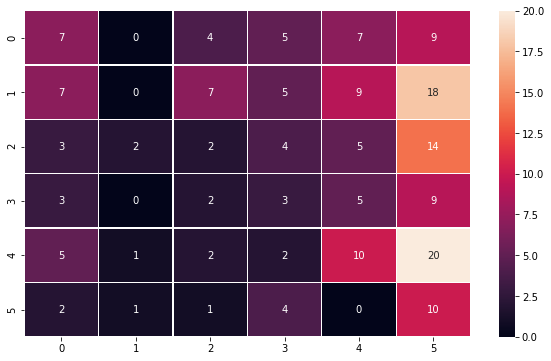

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion, annot=True, linewidths=.3)
plt.show()

### Precision-Recall Report
<div>
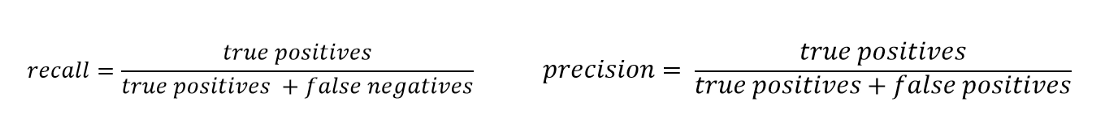
</div>

In [28]:
classes = []
for k, v in category_dict.items(): classes.append(v)
classes

['anger', 'fear', 'joy', 'love', 'sadness', 'thankfulness']

In [29]:
print(classification_report(og_df["emotions_cat"], pred_df["emotions_cat"], target_names=classes))

              precision    recall  f1-score   support

       anger       0.26      0.22      0.24        32
        fear       0.00      0.00      0.00        46
         joy       0.11      0.07      0.08        30
        love       0.13      0.14      0.13        22
     sadness       0.28      0.25      0.26        40
thankfulness       0.12      0.56      0.20        18

    accuracy                           0.17       188
   macro avg       0.15      0.20      0.15       188
weighted avg       0.15      0.17      0.14       188

